# Test KL minimization with non-invertible transformation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from gpsr.beams import NNDist

In [2]:
ndim = 2
nsamp = 10_000

dist = NNDist(width=32, depth=2, ndim=2)
prior = torch.distributions.MultivariateNormal(
    torch.zeros(ndim),
    torch.eye(ndim),
)
optimizer = torch.optim.Adam(dist.parameters(), lr=0.01)

history = {"loss": []}

for iteration in range(201):
    loss = -dist.entropy(nsamp, prior=prior)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    history["loss"].append(loss.item())

    if iteration % 50 == 0:
        print(iteration, loss)

0 tensor(5.9680, grad_fn=<NegBackward0>)
50 tensor(0.0208, grad_fn=<NegBackward0>)
100 tensor(0.0072, grad_fn=<NegBackward0>)
150 tensor(0.0032, grad_fn=<NegBackward0>)
200 tensor(0.0028, grad_fn=<NegBackward0>)


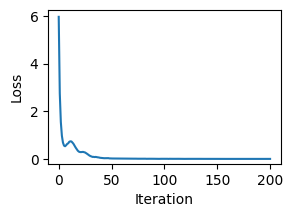

In [3]:
fig, ax = plt.subplots(figsize=(3.0, 2.0))
ax.plot(history["loss"])
ax.set_xlabel("Iteration")
ax.set_ylabel("Loss")
ax.set_ylim(-0.2, ax.get_ylim()[1])
plt.show()

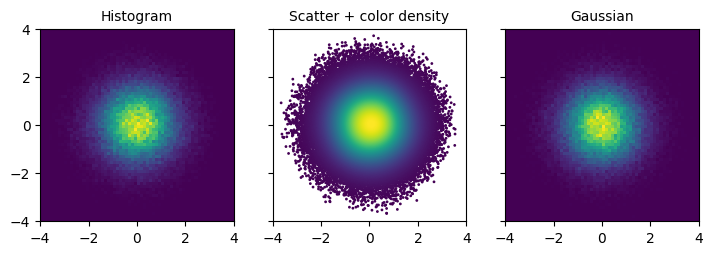

In [4]:
with torch.no_grad():
    # Sample and evaluate density at each point
    x, log_p = dist.sample_and_log_prob(100_000)

    x = x.numpy()
    log_p = log_p.numpy()

    x_prior = prior.rsample((x.shape[0],))
    x_prior = x_prior.numpy()

    # Sort by density
    idx = np.argsort(log_p)
    x = x[idx]
    log_p = log_p[idx]

    # Plot histogram and scatter plot with points colored by density
    plot_xmax = 4.0
    plot_limits = 2 * [(-plot_xmax, plot_xmax)]

    fig, axs = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(8.5, 2.5))

    grid_values, grid_edges = np.histogramdd(
        x, bins=64, range=plot_limits, density=True
    )
    axs[0].hist2d(x[:, 0], x[:, 1], bins=64, range=plot_limits, density=True)
    axs[1].scatter(x[:, 0], x[:, 1], c=np.exp(log_p), s=1)
    axs[2].hist2d(
        x_prior[:, 0], x_prior[:, 1], bins=64, range=plot_limits, density=True
    )
    axs[0].set_title("Histogram", fontsize="medium")
    axs[1].set_title("Scatter + color density", fontsize="medium")
    axs[2].set_title("Gaussian", fontsize="medium")
    plt.show()

### 6D

In [5]:
ndim = 6
nsamp = 10_000

dist = NNDist(width=32, depth=2, ndim=ndim)
prior = torch.distributions.MultivariateNormal(
    torch.zeros(ndim),
    torch.eye(ndim),
)
optimizer = torch.optim.Adam(dist.parameters(), lr=0.01)

history = {"loss": []}
for iteration in range(201):
    loss = -dist.entropy(nsamp, prior=prior)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    history["loss"].append(loss.item())

    if iteration % 50 == 0:
        print(iteration, loss)

0 tensor(15.6921, grad_fn=<NegBackward0>)
50 tensor(0.5616, grad_fn=<NegBackward0>)
100 tensor(0.1513, grad_fn=<NegBackward0>)
150 tensor(0.0573, grad_fn=<NegBackward0>)
200 tensor(0.0320, grad_fn=<NegBackward0>)


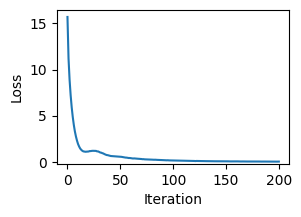

In [6]:
fig, ax = plt.subplots(figsize=(3.0, 2.0))
ax.plot(history["loss"])
ax.set_xlabel("Iteration")
ax.set_ylabel("Loss")
ax.set_ylim(-0.2, ax.get_ylim()[1])
plt.show()

This time we won't make the scatter plot: the density at each point is in 6D space, not the 2D space in the plot.

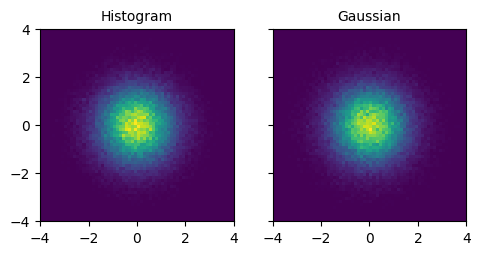

In [7]:
with torch.no_grad():
    # Sample particles.
    x_model = dist.sample(100_000)
    x_prior = prior.rsample((x_model.shape[0],))

    # Plot histogram and scatter plot with points colored by density.
    plot_xmax = 4.0
    plot_limits = 2 * [(-plot_xmax, plot_xmax)]

    fig, axs = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(5.5, 2.5))
    axs[0].hist2d(
        x_model[:, 0], x_model[:, 1], bins=64, range=plot_limits, density=True
    )
    axs[1].hist2d(
        x_prior[:, 0], x_prior[:, 1], bins=64, range=plot_limits, density=True
    )
    axs[0].set_title("Histogram", fontsize="medium")
    axs[1].set_title("Gaussian", fontsize="medium")
    plt.show()